In [1]:
from keras.preprocessing.image import ImageDataGenerator

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  #Kernal kept crashing

train_directory = 'Data/signlang/train'
test_directory = 'Data/signlang/test'
validation_directory = 'Data/signlang/val'

In [2]:
train_datagen = ImageDataGenerator(rotation_range = 5, rescale=1./255, width_shift_range = 0.025, height_shift_range = 0.025, shear_range = 0.025, horizontal_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory(train_directory, target_size=(100,100), batch_size=20, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_directory, target_size=(100,100),batch_size=20, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_directory, target_size=(100,100),batch_size=20, class_mode='categorical', shuffle = False)

Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


In [4]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(100,100,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation='relu',input_shape=(100,100,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation='relu',input_shape=(100,100,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512))
network.add(layers.Dense(10, activation='sigmoid'))
            
network.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [5]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = network.fit(train_generator, steps_per_epoch = 50, epochs = 35, validation_data = validation_generator, validation_steps = 25)

Epoch 1/35
50/50 [==============================] - 12s 221ms/step - loss: 2.6546 - accuracy: 0.1530 - val_loss: 1.9259 - val_accuracy: 0.3040
Epoch 2/35
50/50 [==============================] - 11s 224ms/step - loss: 1.6788 - accuracy: 0.4000 - val_loss: 1.3807 - val_accuracy: 0.4640
Epoch 3/35
50/50 [==============================] - 11s 219ms/step - loss: 1.2941 - accuracy: 0.5540 - val_loss: 0.9434 - val_accuracy: 0.6520
Epoch 4/35
50/50 [==============================] - 11s 220ms/step - loss: 0.9397 - accuracy: 0.6850 - val_loss: 0.7711 - val_accuracy: 0.7520
Epoch 5/35
50/50 [==============================] - 11s 228ms/step - loss: 0.7810 - accuracy: 0.7361 - val_loss: 0.6587 - val_accuracy: 0.8060
Epoch 6/35
50/50 [==============================] - 12s 229ms/step - loss: 0.7043 - accuracy: 0.7513 - val_loss: 0.7739 - val_accuracy: 0.7340
Epoch 7/35
50/50 [==============================] - 11s 227ms/step - loss: 0.6040 - accuracy: 0.7830 - val_loss: 0.6201 - val_accuracy: 0.7860

<function matplotlib.pyplot.show(close=None, block=None)>

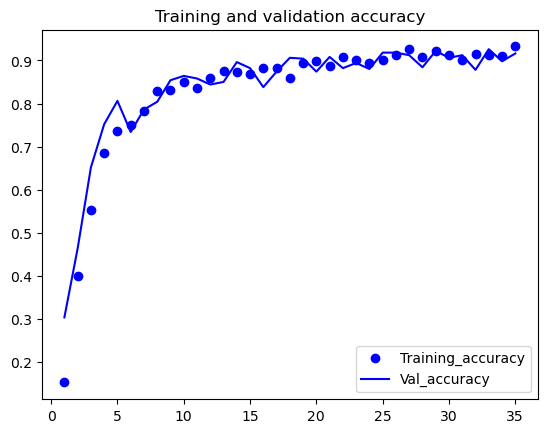

In [6]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training_accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

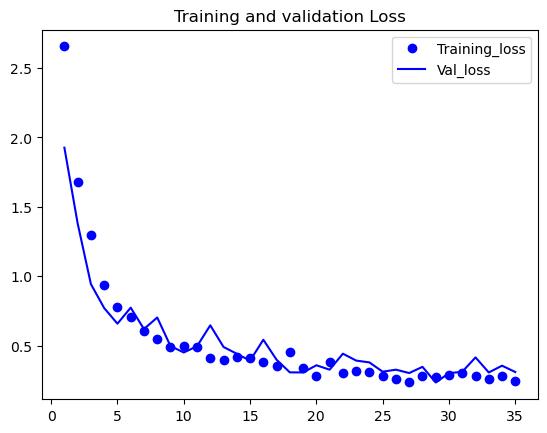

In [7]:
plt.plot(epochs, loss, 'bo', label = 'Training_loss')
plt.plot(epochs, val_loss, 'b', label = 'Val_loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show

In [8]:
res = network.evaluate(test_generator, steps = 14, verbose = 1)
print('Accuracy on test set: %.3f'%res[1])

14/14 [==============================] - 1s 48ms/step - loss: 0.1981 - accuracy: 0.9429
Accuracy on test set: 0.943
